# Clustering on Credit Card Dataset


Clustering is the task of grouping a set of objects in such a way that those in the same group (called a cluster) are more similar to each other than to those in other groups.

## Problem Statement

**This case requires developing a customer segmentation to define a marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.**

#### Following is the Data Dictionary for Credit Card dataset:

- CUSTID: Identification of Credit Cardholder (Categorical)<br>
- BALANCE: Balance amount left in their account to make purchases<br>
- BALANCEFREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
- PURCHASES: Amount of purchases made from the account<br>
- ONEOFFPURCHASES: Maximum purchase amount did in one-go<br>
- INSTALLMENTSPURCHASES: Amount of purchase done in installment<br>
- CASH ADVANCE: Cash in advance given by the user<br>
- PURCHASESFREQUENCY: How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
- ONEOFFPURCHASESFREQUENCY: How frequently Purchases are happening in one go (1 = frequently purchased, 0 = not - frequently purchased)<br>
- PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
- CASHADVANCEFREQUENCY: How frequently is the cash in advance being paid<br>
- CASHADVANCETRX: Number of Transactions made with "Cash in Advanced"<br>
- PURCHASESTRX: Number of purchase transactions made<br>
- CREDIT LIMIT: Limit of Credit Card for user<br>
- PAYMENTS: Amount of Payment done by the user<br>
- MINIMUM_PAYMENTS: Minimum amount of payments made by the user<br>
- PRCFULLPAYMENT: Percent of full payment paid by the user<br>
- TENURE: Tenure of credit card service for user<br>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")


In [4]:
data= pd.read_csv('CC GENERAL.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.shape

(8950, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
# Check the number of null values in each column and sort the results in descending order
null_value_counts = data.isnull().sum().sort_values(ascending=False)
print(null_value_counts)


MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64


In [9]:
# Calculate the mean of the 'MINIMUM_PAYMENTS' column
mean_minimum_payments = data['MINIMUM_PAYMENTS'].mean()

# Impute null values in 'MINIMUM_PAYMENTS' with the mean value
data['MINIMUM_PAYMENTS'].fillna(mean_minimum_payments, inplace=True)

# Print the updated DataFrame to verify the changes
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
# Recheck for null values in the DataFrame after mean imputation
null_value_counts_after_imputation = data.isnull().sum().sort_values(ascending=False)

# Print the null value counts after imputation
print("Null Value Counts After MINIMUM_PAYMENTS mean Imputation:")
print(null_value_counts_after_imputation)


Null Value Counts After MINIMUM_PAYMENTS mean Imputation:
CREDIT_LIMIT                        1
CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64


In [11]:
# Calculate the mean of the 'CREDIT_LIMIT' column
mean_credit_limit = data['CREDIT_LIMIT'].mean()

# Impute the null value in 'CREDIT_LIMIT' with the mean value
data['CREDIT_LIMIT'].fillna(mean_credit_limit, inplace=True)

# Recheck for null values in the DataFrame
null_value_counts_after_imputation = data.isnull().sum().sort_values(ascending=False)

# Print the updated DataFrame with imputed null values
data.head()



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [12]:
# Print the null value counts after imputation
print("\nNull Value Counts After Imputation:")
print(null_value_counts_after_imputation)


Null Value Counts After Imputation:
CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64


In [13]:
cat_col = data.columns[data.dtypes == 'object']
num_col = data.columns[data.dtypes != 'object']


In [14]:
print("Categorical Columns:")
print(cat_col)


Categorical Columns:
Index(['CUST_ID'], dtype='object')


In [15]:
print("\nNumerical Columns:")
print(num_col)


Numerical Columns:
Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [16]:
data[num_col].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


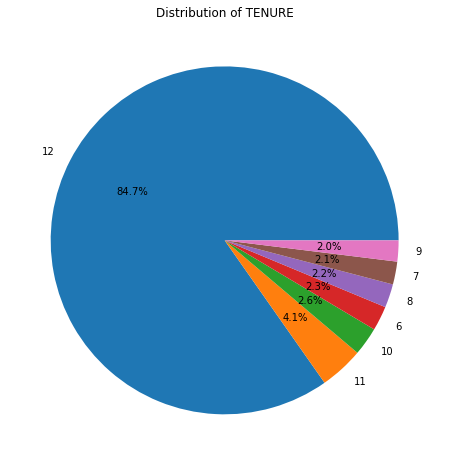

In [17]:
# Create a pie chart to visualize the distribution of 'TENURE' values
# We count the occurrences of each unique 'TENURE' value and plot it in a pie chart.
data['TENURE'].value_counts().plot.pie(y='TENURE', autopct='%1.1f%%',figsize=(8, 8))
plt.title('Distribution of TENURE')
plt.ylabel('')  
plt.show()

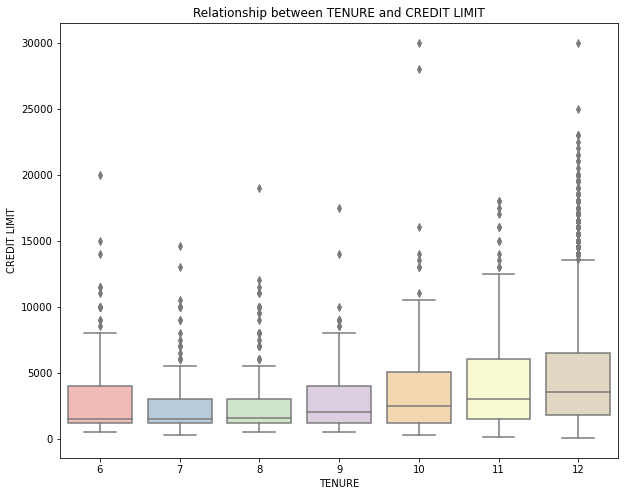

In [18]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='TENURE', y='CREDIT_LIMIT', data=data, palette='Pastel1')
plt.xlabel('TENURE')
plt.ylabel('CREDIT LIMIT')
plt.title('Relationship between TENURE and CREDIT LIMIT')
plt.show()

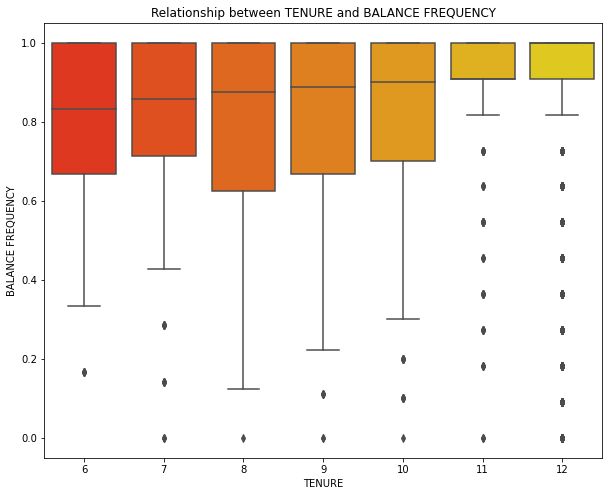

In [19]:
# Create a box plot to visualize the relationship between 'TENURE' and 'BALANCE_FREQUENCY'
plt.figure(figsize=(10, 8))
sns.boxplot(x='TENURE', y='BALANCE_FREQUENCY', data=data, palette='autumn')
plt.xlabel('TENURE')
plt.ylabel('BALANCE FREQUENCY')
plt.title('Relationship between TENURE and BALANCE FREQUENCY')
plt.show()


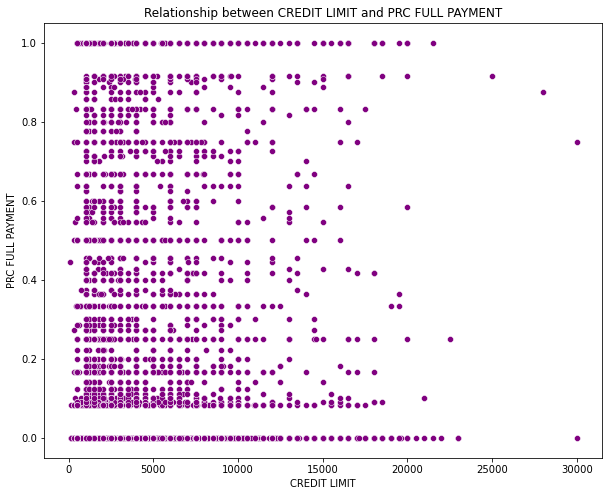

In [20]:
# Create a scatter plot to visualize the relationship between 'CREDIT_LIMIT' and 'PRC_FULL_PAYMENT'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='CREDIT_LIMIT', y='PRC_FULL_PAYMENT', data=data, color='purple')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('PRC FULL PAYMENT')
plt.title('Relationship between CREDIT LIMIT and PRC FULL PAYMENT')
plt.show()


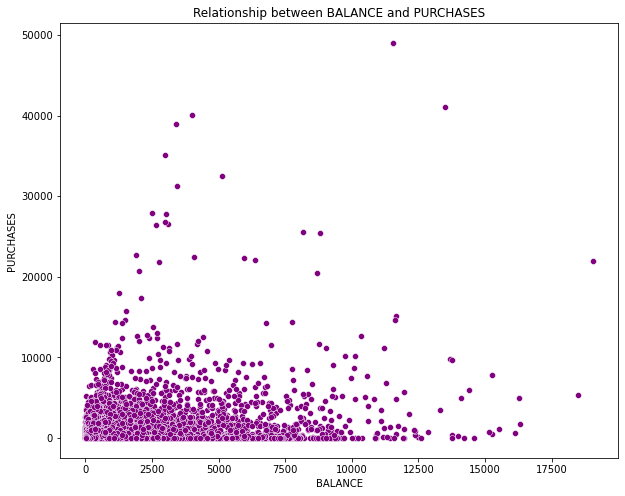

In [21]:
# Create a scatter plot to visualize the relationship between 'BALANCE' and 'PURCHASES'
plt.figure(figsize=(10, 8))
sns.scatterplot(x='BALANCE', y='PURCHASES', data=data, color='purple')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.title('Relationship between BALANCE and PURCHASES')
plt.show()

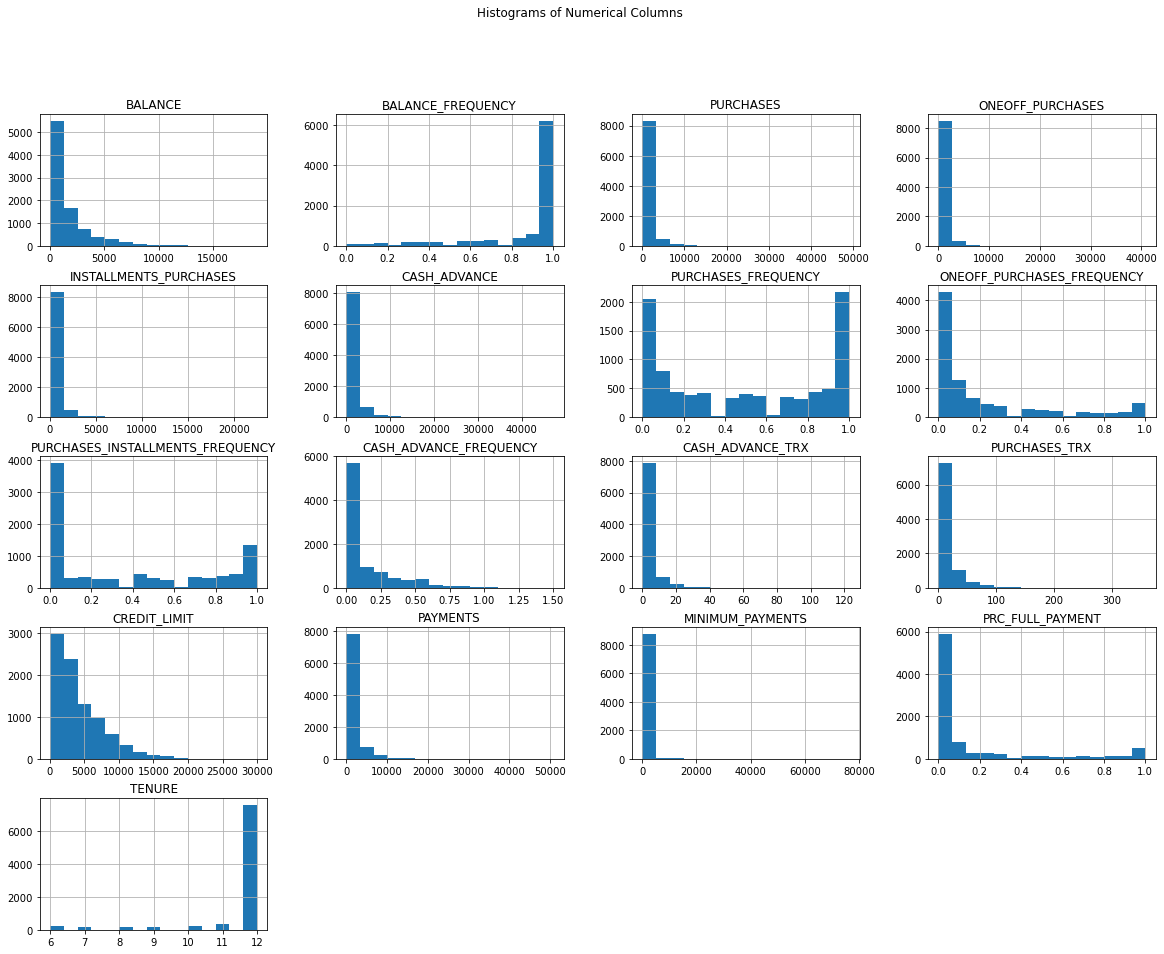

In [22]:
data[num_col].hist(bins=15, figsize=(20, 15), layout=(5, 4))
plt.xlabel('Value')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [23]:
data[num_col].corr()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


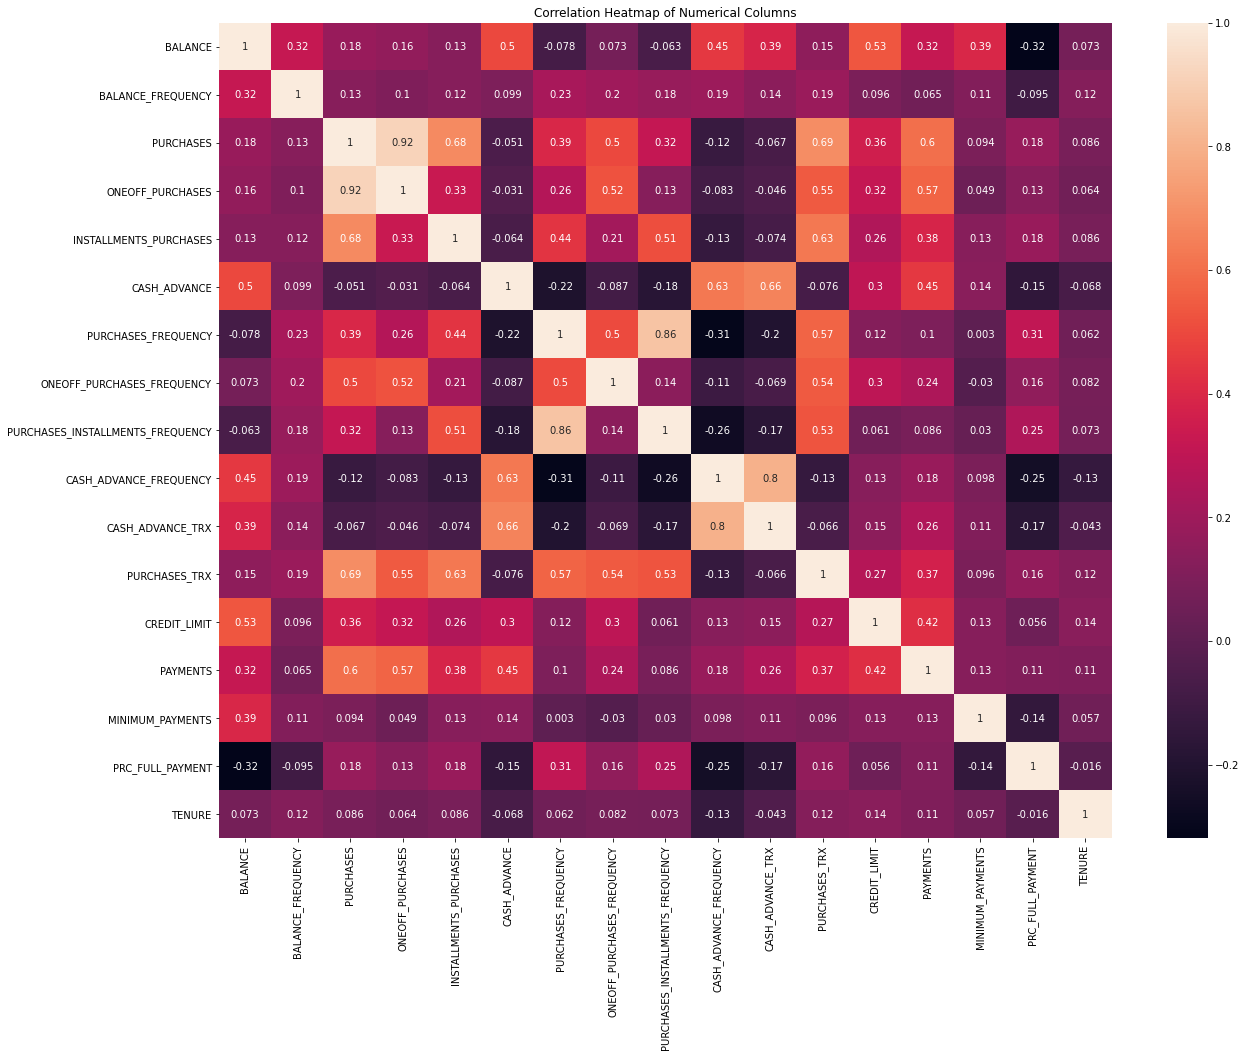

In [24]:
# Create a heatmap of the correlation matrix for numerical columns
plt.figure(figsize=(20, 15))
plt.title('Correlation Heatmap of Numerical Columns')
sns.heatmap(data[num_col].corr(),annot = True)
plt.show()

### Checking outliers

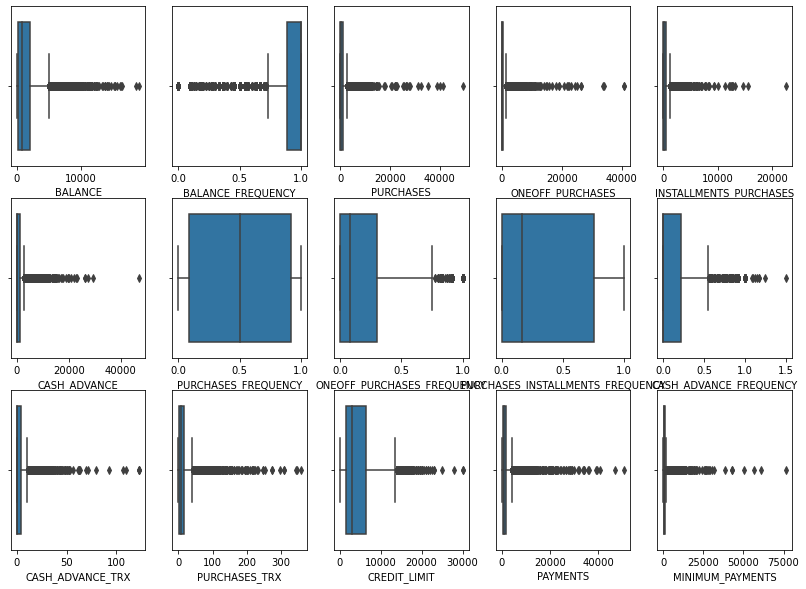

In [25]:
#checking the outliers

plt.figure(figsize=[14,10])

plt.subplot(3,5,1)
sns.boxplot(x=data['BALANCE'],data=data)

plt.subplot(3,5,2)
sns.boxplot(x=data['BALANCE_FREQUENCY'],data=data)

plt.subplot(3,5,3)
sns.boxplot(x=data['PURCHASES'],data=data)

plt.subplot(3,5,4)
sns.boxplot(x=data['ONEOFF_PURCHASES'],data=data)

plt.subplot(3,5,5)
sns.boxplot(x=data['INSTALLMENTS_PURCHASES'],data=data)

plt.subplot(3,5,6)
sns.boxplot(x=data['CASH_ADVANCE'],data=data)

plt.subplot(3,5,7)
sns.boxplot(x=data['PURCHASES_FREQUENCY'],data=data)

plt.subplot(3,5,8)
sns.boxplot(x=data['ONEOFF_PURCHASES_FREQUENCY'],data=data)


plt.subplot(3,5,9)
sns.boxplot(x=data['PURCHASES_INSTALLMENTS_FREQUENCY'],data=data)


plt.subplot(3,5,10)
sns.boxplot(x=data['CASH_ADVANCE_FREQUENCY'],data=data)


plt.subplot(3,5,11)
sns.boxplot(x=data['CASH_ADVANCE_TRX'],data=data)


plt.subplot(3,5,12)
sns.boxplot(x=data['PURCHASES_TRX'],data=data)


plt.subplot(3,5,13)
sns.boxplot(x=data['CREDIT_LIMIT'],data=data)


plt.subplot(3,5,14)
sns.boxplot(x=data['PAYMENTS'],data=data)


plt.subplot(3,5,15)
sns.boxplot(x=data['MINIMUM_PAYMENTS'],data=data)


#plt.subplot(3,5,16)
#sns.boxplot(x=data['PRC_FULL_PAYMENT'],data=data)

plt.show()

<AxesSubplot:xlabel='PRC_FULL_PAYMENT'>

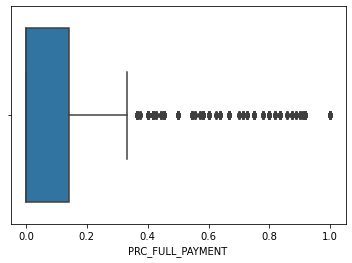

In [26]:
sns.boxplot(x=data['PRC_FULL_PAYMENT'],data=data)

In [27]:
num_col

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [28]:
data[num_col].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [29]:
np.percentile(data['BALANCE'], [75,90,95,99])

array([2054.1400355 , 4338.5636566 , 5909.11180785, 9338.804814  ])

In [30]:
percentile_99 = data['BALANCE'].quantile(0.99)

# Impute outliers with the 99th percentile value
data.loc[data['BALANCE'] > percentile_99, 'BALANCE'] = percentile_99

In [31]:
np.percentile(data['PURCHASES'], [75,90,95,99])

array([1110.13  , 2542.624 , 3998.6195, 8977.29  ])

In [32]:
percentile_99 = data['PURCHASES'].quantile(0.99)

# Impute outliers with the 99th percentile value
data.loc[data['PURCHASES'] > percentile_99, 'PURCHASES'] = percentile_99

In [33]:
np.percentile(data['ONEOFF_PURCHASES'], [50,75,90,95,99])

array([  38.    ,  577.405 , 1600.099 , 2671.094 , 6689.8982])

In [34]:
percentile_90 = data['ONEOFF_PURCHASES'].quantile(0.90)

# Impute outliers with the 90th percentile value
data.loc[data['ONEOFF_PURCHASES'] > percentile_90, 'ONEOFF_PURCHASES'] = percentile_90

In [35]:
np.percentile(data['INSTALLMENTS_PURCHASES'], [50,75,90,95,99])

array([  89.    ,  468.6375, 1140.07  , 1750.0875, 3886.2405])

In [36]:
percentile_95 = data['INSTALLMENTS_PURCHASES'].quantile(0.95)

# Impute outliers with the 95th percentile value
data.loc[data['INSTALLMENTS_PURCHASES'] > percentile_95, 'INSTALLMENTS_PURCHASES'] = percentile_95

In [37]:
np.percentile(data['CASH_ADVANCE'], [50,75,90,95,99,100])

array([    0.        ,  1113.82113925,  3065.53456   ,  4647.169122  ,
        9588.1633568 , 47137.21176   ])

In [38]:
percentile_95 = data['CASH_ADVANCE'].quantile(0.95)

# Impute outliers with the 95th percentile value
data.loc[data['CASH_ADVANCE'] > percentile_95, 'CASH_ADVANCE'] = percentile_95

In [39]:
np.percentile(data['CASH_ADVANCE_TRX'], [50,75,90,95,99,100])

array([  0.,   4.,  10.,  15.,  29., 123.])

In [40]:
percentile_99 = data['CASH_ADVANCE_TRX'].quantile(0.95)

# Impute outliers with the 99th percentile value
data.loc[data['CASH_ADVANCE_TRX'] > percentile_99, 'CASH_ADVANCE_TRX'] = percentile_99

In [41]:
np.percentile(data['PURCHASES_TRX'], [50,75,90,95,99,100])

array([  7.  ,  17.  ,  37.  ,  57.  , 116.51, 358.  ])

In [42]:
percentile_95 = data['PURCHASES_TRX'].quantile(0.95)

# Impute outliers with the 95th percentile value
data.loc[data['PURCHASES_TRX'] > percentile_95, 'PURCHASES_TRX'] = percentile_95

In [43]:
np.percentile(data['CREDIT_LIMIT'], [50,75,90,95,99,100])

array([ 3000.,  6500.,  9500., 12000., 17000., 30000.])

In [44]:
percentile_99 = data['CREDIT_LIMIT'].quantile(0.99)

# Impute outliers with the 99th percentile value
data.loc[data['CREDIT_LIMIT'] > percentile_99, 'CREDIT_LIMIT'] = percentile_99

In [45]:
np.percentile(data['PAYMENTS'], [50,75,90,95,99,100])

array([  856.901546  ,  1901.13431675,  3923.9066424 ,  6082.09059525,
       13608.7155406 , 50721.48336   ])

In [46]:
percentile_99 = data['CREDIT_LIMIT'].quantile(0.99)

# Impute outliers with the 99th percentile value
data.loc[data['CREDIT_LIMIT'] > percentile_99, 'CREDIT_LIMIT'] = percentile_99

In [47]:
np.percentile(data['MINIMUM_PAYMENTS'], [50,75,90,95,99,100])

array([  335.6283125 ,   864.20654231,  1731.6899772 ,  2719.5669348 ,
        8626.69154109, 76406.20752   ])

In [48]:
percentile_99 = data['MINIMUM_PAYMENTS'].quantile(0.99)

# Impute outliers with the 99th percentile value
data.loc[data['MINIMUM_PAYMENTS'] > percentile_99, 'MINIMUM_PAYMENTS'] = percentile_99

In [49]:
data[num_col].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1541.046067,0.877271,936.229237,371.062415,336.336040,817.161146,0.490351,0.202458,0.364437,0.135144,2.731732,12.684022,4473.695260,1733.143852,766.623568,0.153715,11.517318
std,1966.597985,0.236904,1525.185179,548.305044,497.830168,1349.178282,0.401371,0.298336,0.397448,0.200121,4.292846,15.702845,3551.904901,2895.063757,1230.153292,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,9338.804814,1.000000,8977.290000,1600.099000,1750.087500,4647.169122,1.000000,1.000000,1.000000,1.500000,15.000000,57.000000,17000.000000,50721.483360,8626.691541,1.000000,12.000000


## Preprocessing

In [50]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [51]:
hopkins(data.drop('CUST_ID',axis=1))

0.9247763868668215

**`The data looks good for the clustering.`**

In [52]:
## Scaling the data for clustering 
# Here we are using standard scalar.
df1=data.drop('CUST_ID',axis=1)
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [53]:
df1.shape

(8950, 17)

In [54]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_df=scaler.fit_transform(df1)

# KMeans clustering

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


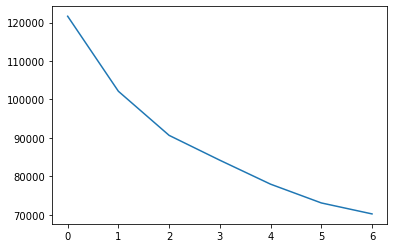

In [56]:
# Finding Optimal number of clusters.
# Elbow Curve

ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(scaled_df)
    ssd.append( kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

**Here we can see the elbow curve on the values 2, 3 and 4.**


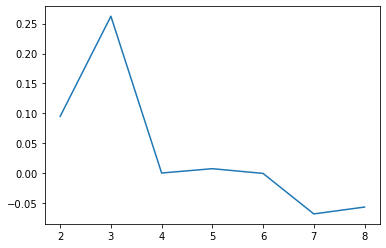

In [57]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 50)
    kmeans.fit(scaled_df)
    ssd.append([num_clusters, silhouette_score(df1, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

since we are getting very strange results we will be using silhoutte score to determine the optimal number of k.


### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

 ### Using silhoutte score to determine the optimal number of k.

In [58]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.21931600695393869
For n_clusters=3, the silhouette score is 0.23435094866396627
For n_clusters=4, the silhouette score is 0.19413615384933605
For n_clusters=5, the silhouette score is 0.19001999608136363
For n_clusters=6, the silhouette score is 0.19895432760714757
For n_clusters=7, the silhouette score is 0.20901827909083728
For n_clusters=8, the silhouette score is 0.21574243838402787


Optimal number of k is 4. #according to the silhoutte score and elbow curve.

### Optimal Number of K=4


In [59]:
### Initialising kmeans
kmeans = KMeans(n_clusters=4, max_iter=100 , random_state = 100)
kmeans.fit(scaled_df)


KMeans(max_iter=100, n_clusters=4, random_state=100)

In [60]:
kmeans.labels_

array([3, 0, 3, ..., 2, 3, 3], dtype=int32)

In [61]:
# assign the label to data frame
data['cluster_id'] = kmeans.labels_
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [62]:
data['cluster_id'].value_counts()

3    3739
2    2396
0    1506
1    1309
Name: cluster_id, dtype: int64

## Visualizing the clusters.


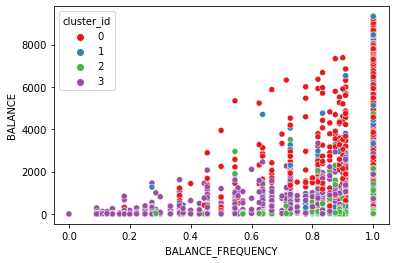

In [63]:
sns.scatterplot(x = 'BALANCE_FREQUENCY', y = 'BALANCE', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

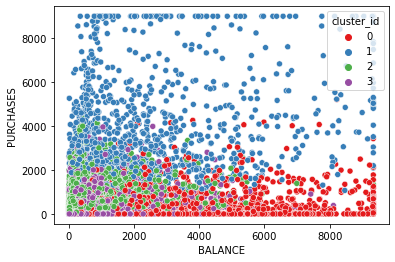

In [64]:
sns.scatterplot(x = 'BALANCE', y = 'PURCHASES', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

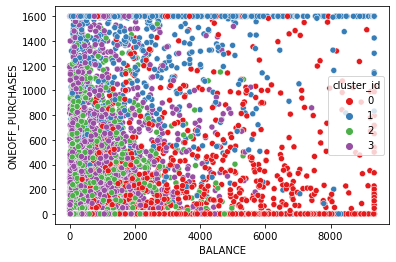

In [65]:
sns.scatterplot(x = 'BALANCE', y = 'ONEOFF_PURCHASES', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

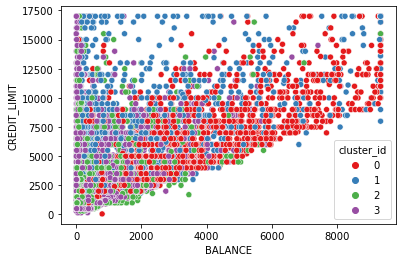

In [66]:
sns.scatterplot(x = 'BALANCE', y = 'CREDIT_LIMIT', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

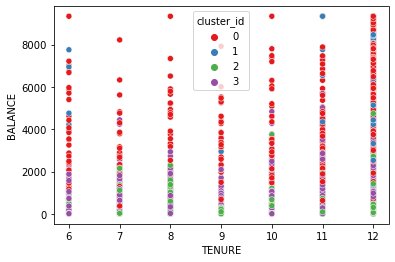

In [67]:

sns.scatterplot(x = 'TENURE', y = 'BALANCE', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

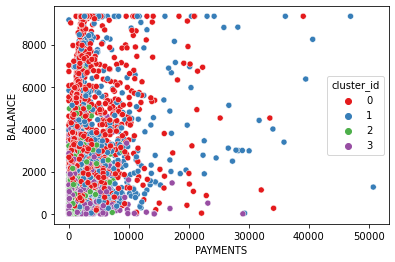

In [68]:
sns.scatterplot(x = 'PAYMENTS', y = 'BALANCE', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

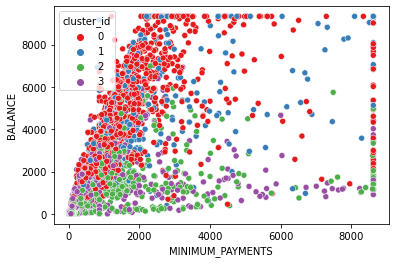

In [69]:
sns.scatterplot(x = 'MINIMUM_PAYMENTS', y = 'BALANCE', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

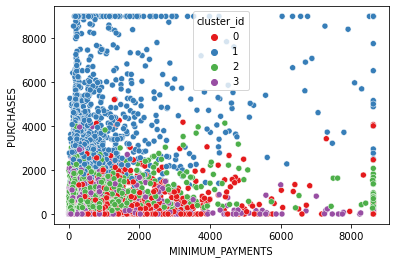

In [70]:
sns.scatterplot(x = 'MINIMUM_PAYMENTS', y = 'PURCHASES', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

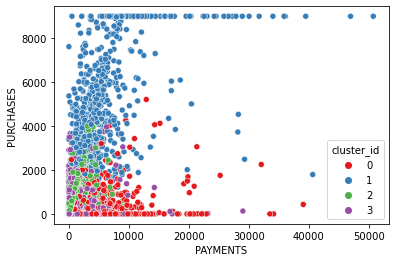

In [71]:
sns.scatterplot(x = 'PAYMENTS', y = 'PURCHASES', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

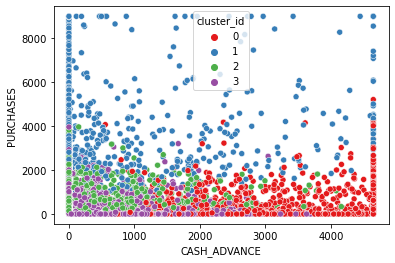

In [72]:
sns.scatterplot(x = 'CASH_ADVANCE', y = 'PURCHASES', hue ='cluster_id', legend = 'full', data = data, palette='Set1')
plt.show()

## KMeans cluster visualizations


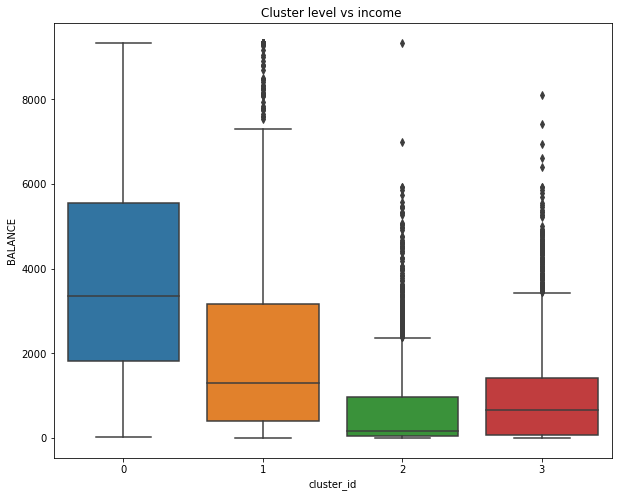

In [73]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x = 'cluster_id',y='BALANCE')
plt.title('Cluster level vs income ')
plt.show()

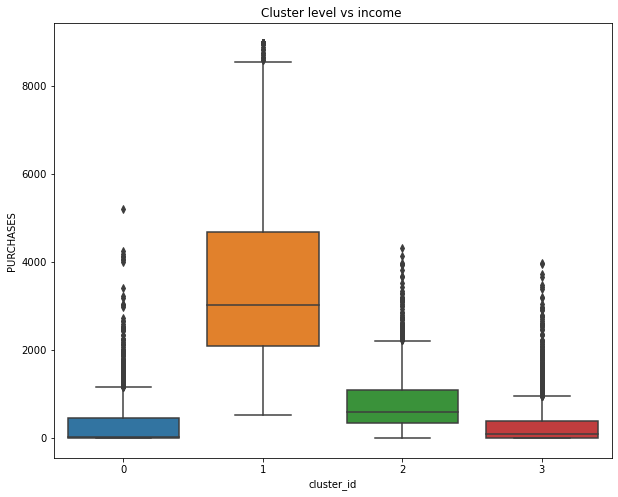

In [74]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x = 'cluster_id',y='PURCHASES')
plt.title('Cluster level vs income ')
plt.show()

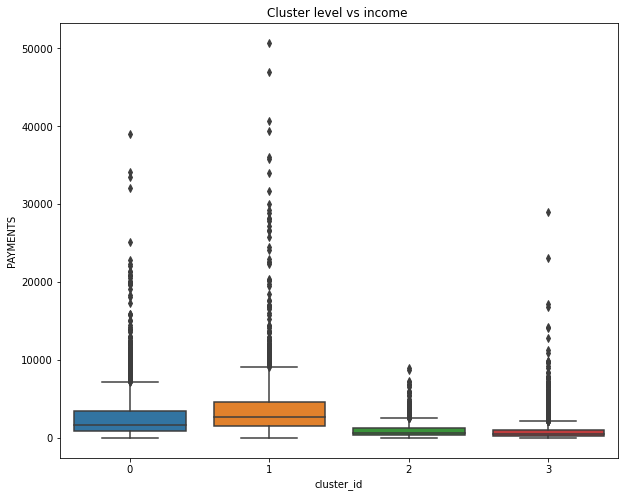

In [75]:
plt.figure(figsize=(10,8))
sns.boxplot(data=data,x = 'cluster_id',y='PAYMENTS')
plt.title('Cluster level vs income ')
plt.show()

# Heirarchal Clustering

In [76]:
%matplotlib inline

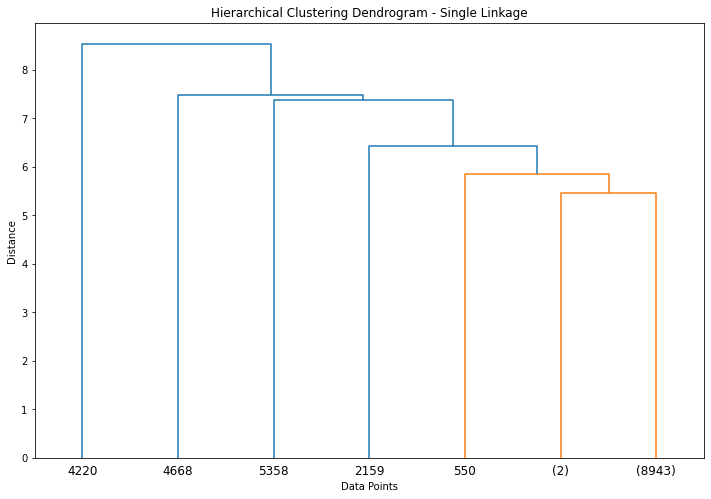

In [77]:
# Forming clusters with the help of Hierarchical Clustering using single linkage
mergings_single = linkage(scaled_df, method="single", metric='euclidean')

# Plotting the Dendrogram
plt.figure(figsize=(12, 8))
dendrogram(mergings_single, truncate_mode='level', p=5)  # Limit to show the last 5 levels
plt.title('Hierarchical Clustering Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

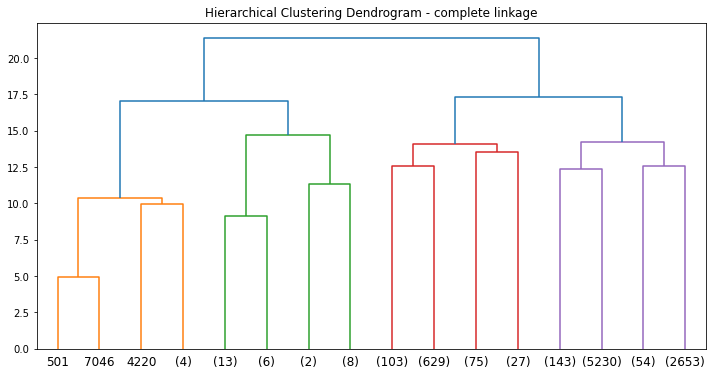

In [78]:
# Forming clusters with the help of Heirarichal Clustering using complete linkage.
mergings_complete = linkage(scaled_df, method="complete", metric='euclidean')
%matplotlib inline
plt.figure(figsize=(12,6))
dendrogram(mergings_complete, truncate_mode='level', p=3)
plt.title('Hierarchical Clustering Dendrogram - complete linkage')
plt.show()


#### Complete linkage is better than Single linkage. So we will go with complete linkage.


In [79]:
### Looking at this we can say that there are 3 clusters forming with heirarichal clustering.

In [80]:
# cutting dendrogram with '3' clusters
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
# assign cluster labels
data['cluster_labels'] = cluster_labels
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id,cluster_labels
0,C10001,40.900749,0.818182,95.40,0.000,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3,0
1,C10002,3202.467416,0.909091,0.00,0.000,0.00,4647.169122,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0
2,C10003,2495.148862,1.000000,773.17,773.170,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,0
3,C10004,1666.670542,0.636364,1499.00,1499.000,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3,0
4,C10005,817.714335,1.000000,16.00,16.000,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3,0
5,C10006,1809.828751,1.000000,1333.28,0.000,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,2,0
6,C10007,627.260806,1.000000,7091.01,1600.099,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,57,13500.0,6354.314328,198.065894,1.000000,12,1,1
7,C10008,1823.652743,1.000000,436.20,0.000,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,2,0
8,C10009,1014.926473,1.000000,861.49,661.490,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,3,0
9,C10010,152.225975,0.545455,1281.60,1281.600,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,3,0


In [82]:
data['cluster_labels'].value_counts()

0    8080
1     834
2      36
Name: cluster_labels, dtype: int64

## Visualizing the clusters.

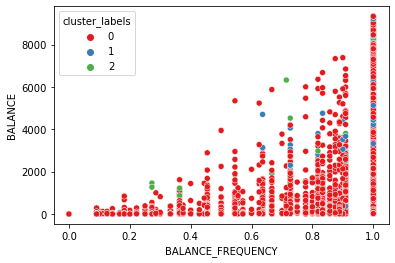

In [83]:
sns.scatterplot(x = 'BALANCE_FREQUENCY', y = 'BALANCE', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

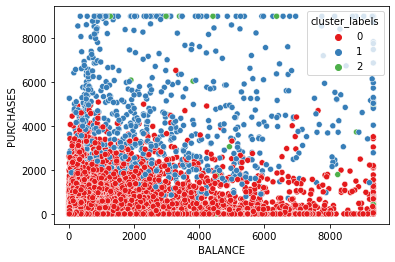

In [84]:
#health
sns.scatterplot(x = 'BALANCE', y = 'PURCHASES', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()


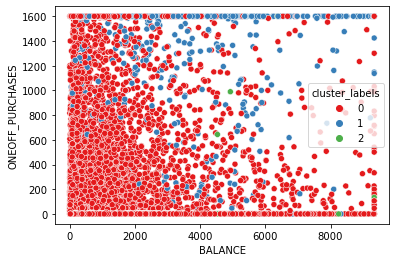

In [85]:
sns.scatterplot(x = 'BALANCE', y = 'ONEOFF_PURCHASES', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

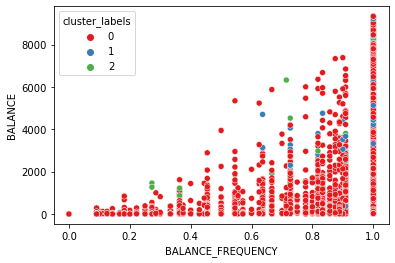

In [86]:
sns.scatterplot(x = 'BALANCE_FREQUENCY', y = 'BALANCE', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

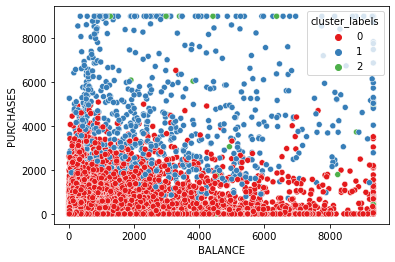

In [87]:
sns.scatterplot(x = 'BALANCE', y = 'PURCHASES', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

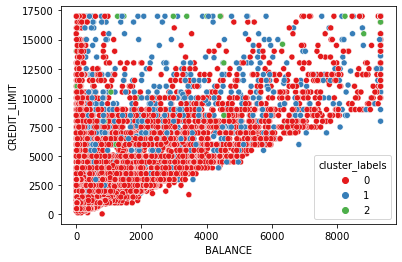

In [88]:
sns.scatterplot(x = 'BALANCE', y = 'CREDIT_LIMIT', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

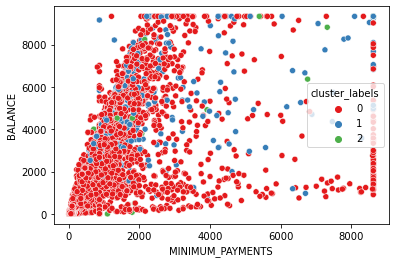

In [89]:
sns.scatterplot(x = 'MINIMUM_PAYMENTS', y = 'BALANCE', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

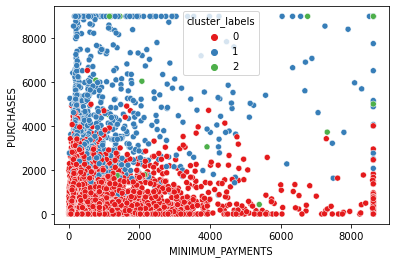

In [90]:

sns.scatterplot(x = 'MINIMUM_PAYMENTS', y = 'PURCHASES', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

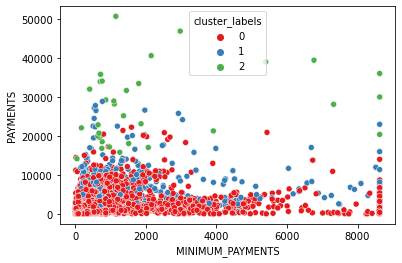

In [91]:
sns.scatterplot(x = 'MINIMUM_PAYMENTS', y = 'PAYMENTS', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

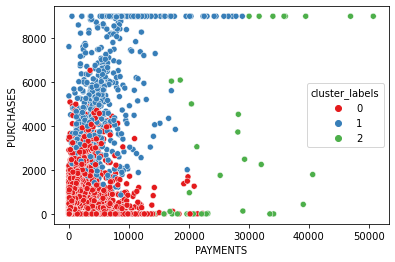

In [92]:
sns.scatterplot(x = 'PAYMENTS', y = 'PURCHASES', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

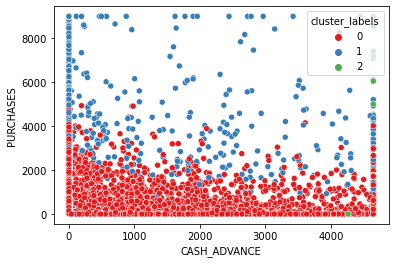

In [93]:
sns.scatterplot(x = 'CASH_ADVANCE', y = 'PURCHASES', hue ='cluster_labels', legend = 'full', data = data, palette='Set1')
plt.show()

In [94]:
### This Heirarchal Clustering is not good results so will see DBSCAN

## DBSCAN Clustering

In [95]:
from sklearn.cluster import DBSCAN

In [96]:
scaler = StandardScaler()
df=data.drop('CUST_ID',axis=1)

scaled_df = scaler.fit_transform(df)


In [97]:
# Apply DBSCAN clustering
# The main hyperparameters for DBSCAN are 'eps' and 'min_samples'

dbscan = DBSCAN(eps=1.7, min_samples=100)
data['cluster_label_dbscan'] = dbscan.fit_predict(scaled_df)

In [98]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_id,cluster_labels,cluster_label_dbscan
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,3,0,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,4647.169122,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,0,-1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,3,0,-1
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,864.206542,0.000000,12,3,0,-1
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,3,0,0


In [99]:
data['cluster_label_dbscan'].value_counts()

 0    4718
-1    3797
 1     435
Name: cluster_label_dbscan, dtype: int64

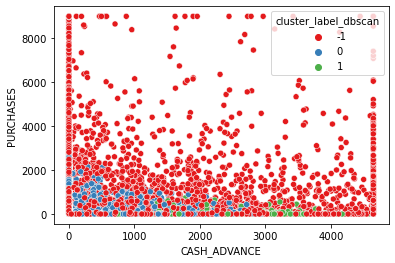

In [100]:
sns.scatterplot(x = 'CASH_ADVANCE', y = 'PURCHASES', hue ='cluster_label_dbscan', legend = 'full', data = data, palette='Set1')
plt.show()

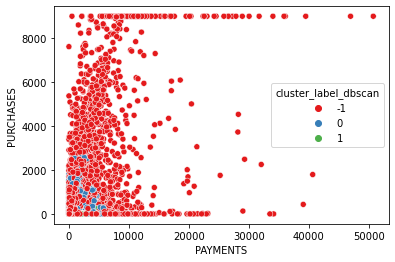

In [101]:
sns.scatterplot(x = 'PAYMENTS', y = 'PURCHASES', hue ='cluster_label_dbscan', legend = 'full', data = data, palette='Set1')
plt.show()

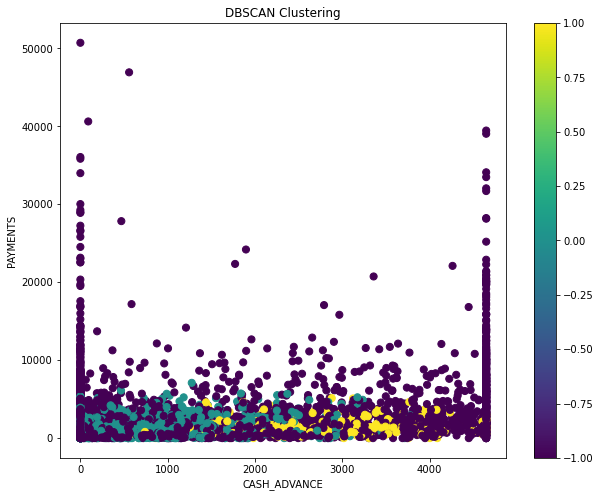

In [102]:
plt.figure(figsize=(10, 8))
plt.scatter(data['CASH_ADVANCE'], data['PAYMENTS'], c=data['cluster_label_dbscan'], cmap='viridis', s=50)
plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')
plt.title('DBSCAN Clustering')
plt.colorbar()
plt.show()

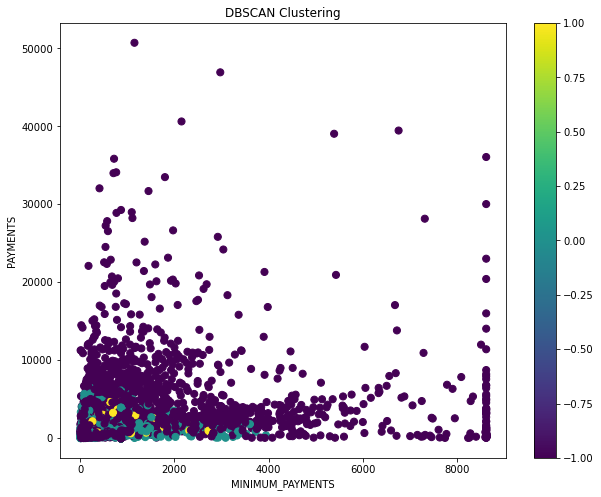

In [103]:
plt.figure(figsize=(10, 8))
plt.scatter(data['MINIMUM_PAYMENTS'], data['PAYMENTS'], c=data['cluster_label_dbscan'], cmap='viridis', s=50)
plt.xlabel('MINIMUM_PAYMENTS')
plt.ylabel('PAYMENTS')
plt.title('DBSCAN Clustering')
plt.colorbar()
plt.show()

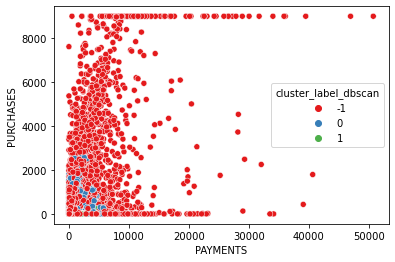

In [104]:
sns.scatterplot(x = 'PAYMENTS', y = 'PURCHASES', hue ='cluster_label_dbscan', legend = 'full', data = data, palette='Set1')
plt.show()

**From above models will choose KMeans as best model because it is segmenting customers better than that of DBSCAN and Heirarchal Clustering**